In [1]:
import numpy as np
import math     
from math import sqrt, erfc, exp, log, pi
import matplotlib.pyplot as plt

%matplotlib inline

#  Singh 2003
#  Streamflow depletion in fully penetrating stream with semipervious streambed.

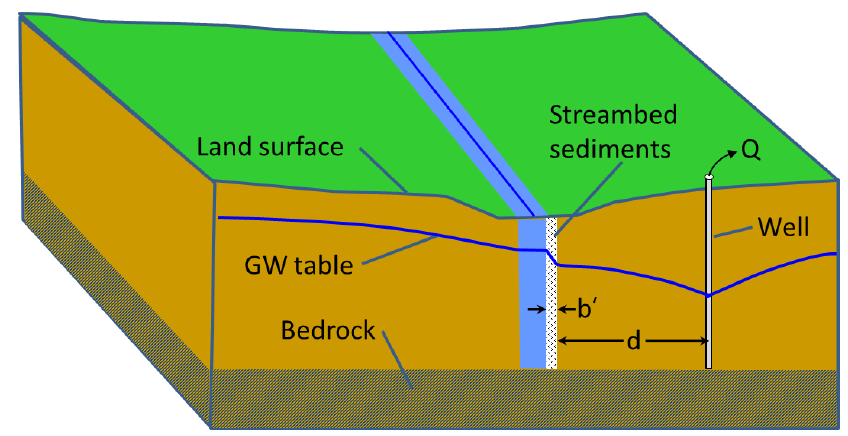

In [2]:
from IPython.display import Image 
pil_img = Image(filename='Hantush1965.png')
display(pil_img)

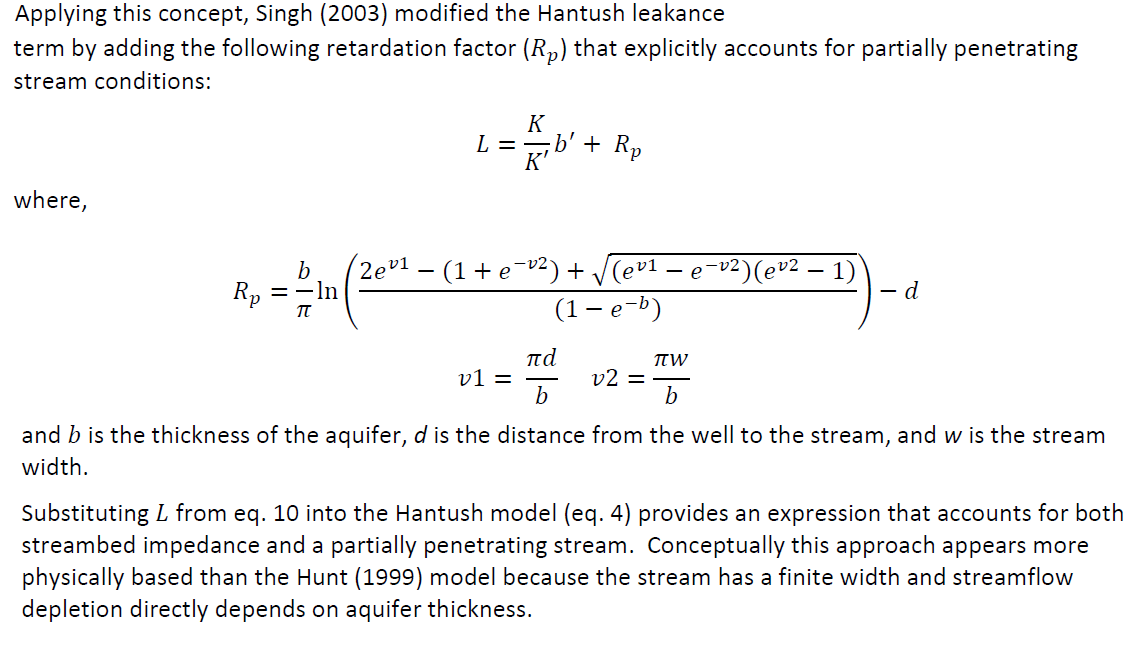

In [3]:
pil_img = Image(filename='Singh2003_f.png')
display(pil_img)

In [4]:
  # It contains numerous assumptions:
  # itemize{
  # Horizontal flow >> vertical flow (Dupuit assumptions hold)
  # Homogeneous, isotropic aquifer
  # Constant {Tr}: Aquifer is confined, or if unconfined change in head is small relative to aquifer thickness
  # Stream is straight, infinitely long, and remains in hydraulic connection to aquifer
  # Constant stream stage
  # No changes in recharge due to pumping
  # No streambank storage
  # Constant pumping rate
  # Aquifer extends to infinity
  # }
  # return A numeric of {Qf}, streamflow depletion as fraction of pumping rate [-].
  # If the pumping rate of the well ({Qw}; [L3/T]) is known, you can calculate volumetric streamflow depletion [L3/T] as {Qf*Qw}
  # import From magrittr 
  # references:
  

In [12]:
   # constants
S = 0.15    # param S aquifer storage coefficient [](specific yield if unconfined; storativity if confined)
d = 50      # param d distance from well to stream [L]
t = 3650       # param t times you want output for [T]
Kh = 0.001    # param Kh aquifer horizontal hydraulic conductivity [L/T]
b = 10       # param b aquifer saturated thickness [L]
Kriv = 0.01  # param Kriv streambed semipervious layer hydraulic conductivity [L/T]
briv = 5    # param briv streambed semipervious layer thickness [L]
w = 20      # param w stream width [L]

In [13]:
  # Transmissivity
Tr = Kh * b
    # Streambed Leakance
v1 = (pi * d) / b
v2 = (pi * w) / b
Rp = (b / pi) * log((2*exp(v1)-(1+exp(-v2)+sqrt(((exp(v1)-exp(-v2))*(exp(v2)-1)))))/(1-exp(-b)))-d
L = ((Kh / Kriv) * briv) + Rp

In [14]:
sfd = [erfc(sqrt(S * d ** 2 / (4 * Tr * 1+i))) - exp((Tr * 1+i) / ((S * L **2) \
    + (d / L))) * erfc(sqrt((Tr * 1+i) / (S * L **2)) + sqrt((S * d **2) / (4 * Tr * 1+i)))
    for i in range(0, t, 1)]
sfd1 = (sfd)
np.array(sfd1)

array([0.00000000e+000, 7.51204113e-159, 6.08844927e-082, ...,
       6.50201465e-001, 6.50246215e-001, 6.50290948e-001])

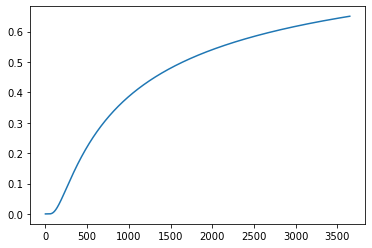

In [15]:
# SFD = streamflow depletion factor
plt.plot(sfd)

In [16]:
Qw = 10      # pumping rate of the well ({Qw}; [L3/T])

In [17]:
# Plot capture fraction through time
capture = Qw * np.array(sfd1)

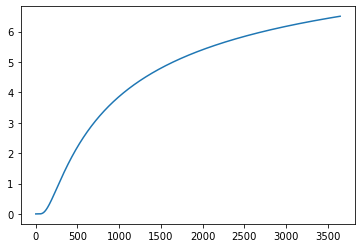

In [18]:
plt.plot(capture)

In [ ]:
np.savetxt("Singh_2003.csv", capture, delimiter="/")